# TD de traitements d'images - correction
### M2 RPM et IBM - 2020



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.color
import skimage.exposure

# Exercice 1 - Grille d'échantillonnage
----

Une image radiologique présente une résolution spatiale de $0,5\ mm$. Les dimensions du film sont $36 \times 43\ cm²$. Sur combien de pixels est-il pertinent de numériser cette image ?

## Solution 

On choisit la période d'échantillonnage (i.e taille du pixel) comme valant la moitié de la résolution spatiale.

Soit $d = \frac{0,5}{2}=0,25\ mm$.

La fréquence d'échantillonnage vaut $f_{e} = \frac{1}{d}=4\ mm^{-1}$.

Il faut donc $4$ pixels / mm.

Pour une image de $360 \times 430\ mm^{2}$, on utilisera ainsi $1440 \times 1720$ pixels.


# Exercice 2 - Qualité d'images
----

Pour la détection du cancer du sein, deux types de techniques d'imagerie sont le plus souvent utilisés : la mammographie (MAM) et l'imagerie par résonance magnétique (IRM).

On fait l'acquisition d'un point blanc (intensité $255$) sur un fond noir (intensité $0$) avec ces 2 systèmes. La figure ci-dessous réprésente les profils d'intensité de la ligne centrale des images obtenues avec les deux systèmes. Les images sont de taille $64 \times 64$ pixels. 

<center>
<img src="./data/impulsion.png" width="300" align="center;" />
<img src="./data/qualite1.png" width="500" align="center;" />
</center>

1. 
Sur un même graphe, dessinez grossièrement l'allure des fonctions de transfert de modulation de ces deux systèmes.
<center>
$FTM(u) = \frac{H(u)}{H(0)}$ avec $H$ la transformée de Fourier
</center> 
2. 
Lequel de ces 2 systèmes offre un meilleur contraste ?
3. 
Lequel de ces 2 systèmes offre une meilleure résolution ?
4. 
En jugeant uniquement sur la qualité d'images, quel serait le système optimal pour détecter des petites tumeurs ?

## Solution

1. 
Fonction gaussienne <br>
La TF d'une fonction gaussienne est une gaussienne. <br>
Propriété de dilatation de la TF : une gaussienne étroite devient gaussienne dilatée.
<center>
<img src="./data/qualite2.png" width=500 align='center'>
</center>
2. 
La MAM offre le meilleur contraste. Deux justifications possibles :
 * dans le domaine spatial, la réponse impulsionnelle de la MAM est d'une intensité plus grande ($255$) que celle de l'IRM ($180$) par rapport à une même valeur minimale ($0$).
 * dans le domaine fréquentiel, la FTM de la MAM est supérieure à celle de l'IRM pour toutes les valeurs de $f$, indiquant un meilleur rapport modulation entrée/sortie.
 
3. 
La MAM offre la meilleure résolution. Deux justifications possibles :
 * dans le domaine spatial, la largeur à mi-hauteur de la MAM est plus petite que celle de l'IRM
 * dans le domaine fréquentiel, la fréquence de coupure de la MAM est plus élevée que celle de l'IRM, indiquant qu'on peut imager de plus grandes fréquences, correspondant à de plus fins détails.
 
4. 
On souhaite détecter de petites tumeurs, donc on souhaiterait la meilleure résolution possible. La MAM semble le meilleur choix, d'autant plus qu'elle offre le meilleur contraste.

# Exercice 3 - Manipulation d'histogramme
----
1. Identifiez à quelles régions de l'image ci-dessous correspondent les différents modes de l'histogramme 
<center>
<img src="./data/ex5a.png" width=500 align='center'>
</center>
2. Différents traitements ont été appliqués à l'image : associez chaque histogramme numéroté de 1 à 4 à son image correspondante et précisez la transformation effectuée
<center>
<img src="./data/ex5b.png" width=1000 align='center'>
</center>

## Solution

1. 
Un mode pour les toitures, les façades, les murs, l'eau et le ciel.

2. 
A-3 : normalisation d'histogramme (intervalle $[0,1]$ vers intervalle $[0.2,0.7]$) <br>
B-1 : égalisation d'histogramme (histogramme plat --> augmentation du contraste notamment dans les zones sombres) <br>
C-4 : inversion d'histogramme (on renverse la dynamique de l'image) <br>
D-2 : contraction d'histogramme (on multiplie toutes les valeurs de niveaux de gris par $0.3$ --> assombrissement global de l'image) <br>

## Code Python

(0.0, 1.0)

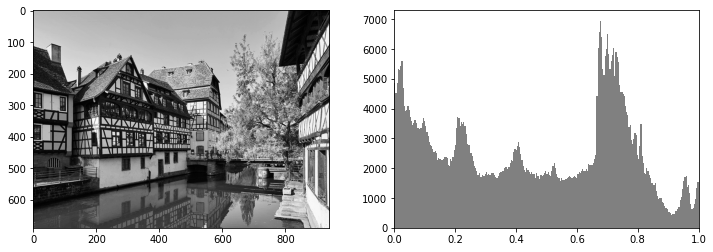

In [2]:
img = plt.imread('./data/strasbourg.jpg')
img = skimage.color.rgb2gray(img)
plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.hist(img.flatten(),bins=256, range=[0,1], color='gray') 
plt.xlim(0,1)

0.0 1.0


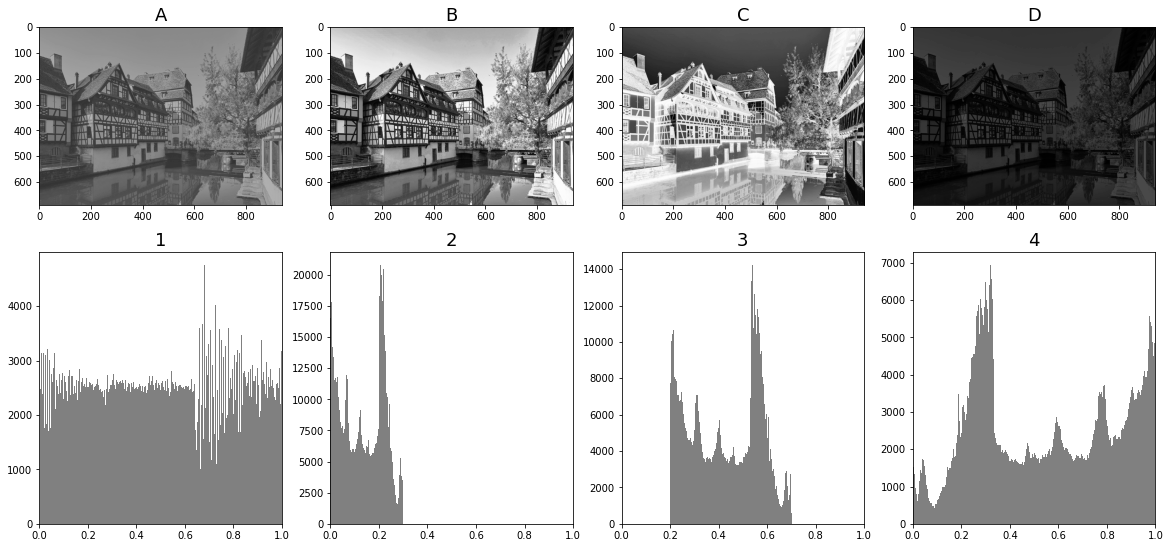

In [3]:
data = img
print(data.min(),data.max())
#data1 = histeq2(data)
data1 = skimage.exposure.equalize_hist(data)
data2 = 1-data
data3 = 0.3*data
A = data.min()
B = data.max()
a=0.2
b=0.7
data4 = np.array( data*(b-a) + a, dtype='float')

plt.figure(figsize=(20,20))
plt.subplot(441)
plt.imshow(data4,cmap='gray',vmin=0,vmax=1)
plt.title('A',fontsize=18)
plt.subplot(445)
plt.hist(data1.flatten(),range=(0,1), bins=256, color='gray')
plt.xlim(0,1)
plt.title('1',fontsize=18)
plt.subplot(442)
plt.imshow(data1,cmap='gray',vmin=0,vmax=1)
plt.title('B',fontsize=18)
plt.subplot(446)
plt.hist(data3.flatten(),range=(0,1), bins=256, color='gray')
plt.xlim(0,1)
plt.title('2',fontsize=18)
plt.subplot(443)
plt.imshow(data2,cmap='gray',vmin=0,vmax=1)
plt.title('C',fontsize=18)
plt.subplot(447)
plt.hist(data4.flatten(),range=(0,1), bins=256, color='gray')
plt.xlim(0,1)
plt.title('3',fontsize=18)
plt.subplot(444)
plt.imshow(data3,cmap='gray',vmin=0,vmax=1)
plt.title('D',fontsize=18)
plt.subplot(448)
plt.hist(data2.flatten(),range=(0,1), bins=256, color='gray')
plt.xlim(0,1)
plt.title('4',fontsize=18)
plt.subplots_adjust(wspace=0.2, hspace=0)

# Exercice 4 - Convolution
---------

On observe l’image à niveaux de gris $f$ et le filtre $h$ définis ci-dessous :

$$f=\begin{pmatrix} 0&0&0&0 \\ 0&1&1&0 \\ 0&2&1&0 \\ 0&0&1&0 \end{pmatrix} \qquad  h=\begin{pmatrix} 0&0&0 \\ 1&-1&1 \\ 0&1&0 \end{pmatrix}$$

Calculez le résultat des convolutions de $f$ par $h$ dans les cas suivants de gestion de bords :
    
1. complétion avec des zéros 

2. miroir

3. répétition 

## Solution
Chaque pixel résultat est donc obtenu en faisant une combinaison linéaire (ou moyenne pondérée) du pixel $f(x,y)$ de l'image initiale et de ses 8 proches voisins. <br>

On voit que la relation ne peut s'appliquer sur les bords de l'image, plus précisément sur les 4 rangées horizontales et verticales des bords. Il faut donc prévoir un traitement spécial pour ces rangées. La solution la plus simple, consiste à remplir ces rangées avec un niveau constant (par exemple noir). Une autre solution est de répliquer sur ces rangées les rangées voisines. Dans ces deux cas, l'information sur les bords est perdue. On peut aussi décider de ne pas modifier ces rangées, ce que nous allons faire. En tout cas, on évite de réduire la taille de l'image.

1. $$g=\begin{pmatrix} 0&1&1&0 \\ 1&2&1&1 \\ 2&-1&2&1 \\ 0&1&-1&1 \end{pmatrix}$$

2. $$g=\begin{pmatrix} 0&1&1&0 \\ 2&2&1&2 \\ 4&-1&2&2 \\ 0&3&0&2 \end{pmatrix}$$

3. $$g=\begin{pmatrix} 0&1&1&0 \\ 1&2&1&1 \\ 2&-1&2&1 \\ 0&1&-1&1 \end{pmatrix}$$

## Code Python

In [4]:
f = np.array([[0,0,0,0],[0,1,1,0],[0,2,1,0],[0,0,1,0]])
print(f)

[[0 0 0 0]
 [0 1 1 0]
 [0 2 1 0]
 [0 0 1 0]]


In [5]:
h =np.array([[0,0,0],[1,-1,1],[0,1,0]])
print(h)

[[ 0  0  0]
 [ 1 -1  1]
 [ 0  1  0]]


Extrait de la documentation sur la fonction `convolve` 

The mode parameter determines how the input array is extended beyond its boundaries. Default is ‘reflect’. Behavior for each valid value is as follows:

    ‘reflect’ (d c b a | a b c d | d c b a)
The input is extended by reflecting about the edge of the last pixel.

    ‘constant’ (k k k k | a b c d | k k k k)
The input is extended by filling all values beyond the edge with the same constant value, defined by the cval parameter.

    ‘nearest’ (a a a a | a b c d | d d d d)
The input is extended by replicating the last pixel.

    ‘mirror’ (d c b | a b c d | c b a)
The input is extended by reflecting about the center of the last pixel.

    ‘wrap’ (a b c d | a b c d | a b c d)
The input is extended by wrapping around to the opposite edge.



***Attention (et c'est ce qui m'a troublé pendant le TD), la fonction <code>convolve</code> de la bibliothèque <code>scipy.ndimage</code> implémente un calcul rigoureux de la convolution qui fait intervenir une symétrie centrale du noyau par rapport à son centre (inversion des coordonnées $x$ et $y$). En remplaçant <code>h</code> par <code>h[::-1, ::-1]</code> dans la fonction, on retrouve bien les mêmes valeurs que celles calculées "à la main". J'ai volontairement passé ce point sous silence pendant le cours car cette symétrie centrale est présente pour une raison technique et n'a pas vraiment d'importance en pratique, en particulier car la plupart des noyaux de convolution sont symétriques.***

### Complétion avec des zéros

In [6]:
g1 = scipy.ndimage.convolve(f,h[::-1, ::-1],mode='constant',cval=0)
print(g1)

[[ 0  1  1  0]
 [ 1  2  1  1]
 [ 2 -1  2  1]
 [ 0  1 -1  1]]


### Miroir

In [7]:
g2 = scipy.ndimage.convolve(f,h[::-1, ::-1],mode='mirror')
print(g2)

[[ 0  1  1  0]
 [ 2  2  1  2]
 [ 4 -1  2  2]
 [ 0  3  0  2]]


### Répétition des bords

In [8]:
g3 = scipy.ndimage.convolve(f,h[::-1, ::-1],mode='wrap')
print(g3)

[[ 0  1  1  0]
 [ 1  2  1  1]
 [ 2 -1  2  1]
 [ 0  1 -1  1]]


# Exercice 5 - Histogramme et filtrage médian
----

La matrice ci-dessous représente les valeurs des pixels d'une image $I$, en niveaux de gris, de taille $8 \times 8$ dont ces valeurs sont codées sur 8 bits.

$$I=\begin{pmatrix} 122&122&122&59&59&30&30&30 \\ 122&0&59&59&255&59&30&30 \\ 122&122&59&0&59&59&0&30 \\ 122&122&59&59&59&59&30&30 \\ 122&255&122&59&59&30&30&30 \\ 45&45&0&45&60&60&60&60 \\ 45&45&45&45&255&60&0&60 \\ 45&45&45&45&60&60&60&60 \end{pmatrix}$$

1. 
Complétez le tableau suivant 
<table style="float: center; width: 100%;" border="2">
<tbody>
<tr>
<td>Niveau de gris</td>
<td>0</td>
<td>30</td>
<td>45</td>
<td>59</td>
<td>60</td>
<td>122</td>
<td>255</td>
</tr>
<tr>
<td>Histogramme</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Histogramme cumulé</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
</tbody>
</table>
2. 
Appliquez un filtre médian, avec un filtre de taille $3 \times 3$, sur l'image $I$. Donnez la matrice image résultante

3. 
Quelle est la catégorie de ce filtre ? Quel type de bruit veut-on supprimer sur cette image ? Commentez le résultat du filtrage

## Solution

1. 
<table style="float: center; width: 100%;" border="2">
<tbody>
<tr>
<td>Niveau de gris</td>
<td>0</td>
<td>30</td>
<td>45</td>
<td>59</td>
<td>60</td>
<td>122</td>
<td>255</td>
</tr>
<tr>
<td>Histogramme</td>
<td>5</td>
<td>11</td>
<td>11</td>
<td>14</td>
<td>10</td>
<td>10</td>
<td>3</td>
</tr>
<tr>
<td>Histogramme cumulé</td>
<td>5</td>
<td>16</td>
<td>27</td>
<td>41</td>
<td>51</td>
<td>61</td>
<td>64</td>
</tr>
</tbody>
</table>
2. 
$$I_{med}=\begin{pmatrix} 122&122&59&59&59&30&30&30 \\ 122&122&59&59&59&59&30&30 \\ 122&122&59&59&59&59&30&30 \\ 122&122&59&59&59&59&30&30 \\ 122&122&59&59&59&59&30&30 \\ 45&45&45&59&59&60&60&60 \\ 45&45&45&45&60&60&60&60 \\ 45&45&45&45&60&60&60&60 \end{pmatrix}$$
3. 
Filtre non-linéaire. <br>
Le bruit que nous souhaitons supprimer est du bruit impulsionnel (ou bruit "poivre et sel"). <br>
Le bruit est bien supprimé avec ce filtre tout en préservant l'information utile et les contours.

## Code Python

[[122 122 122  59  59  30  30  30]
 [122   0  59  59 255  59  30  30]
 [122 122  59   0  59  59   0  30]
 [122 122  59  59  59  59  30  30]
 [122 255 122  59  59  30  30  30]
 [ 45  45   0  45  60  60  60  60]
 [ 45  45  45  45 255  60   0  60]
 [ 45  45  45  45  60  60  60  60]]


(-0.5, 7.5, 7.5, -0.5)

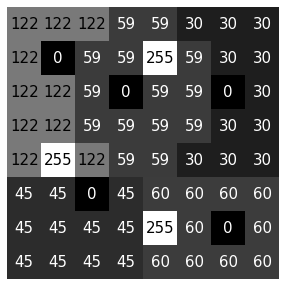

In [9]:
I = np.array([[122,122,122,59,59,30,30,30],[122,0,59,59,255,59,30,30],[122,122,59,0,59,59,0,30],[122,122,59,59,59,59,30,30],[122,255,122,59,59,30,30,30],[45,45,0,45,60,60,60,60],[45,45,45,45,255,60,0,60],[45,45,45,45,60,60,60,60]])
print(I)
plt.figure(figsize=(5,5))
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
for (j,i),label in np.ndenumerate(I):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>100 else 'w')
plt.axis('off')

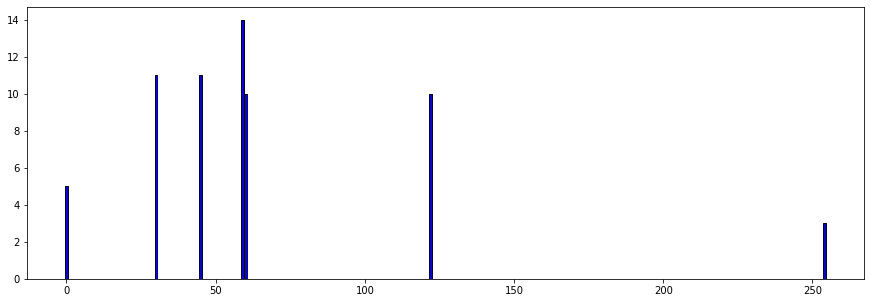

In [10]:
plt.figure(figsize=(15,5))
plt.hist(I.flatten(),bins=range(256),color='blue',edgecolor='black',align='left') ; plt.show()

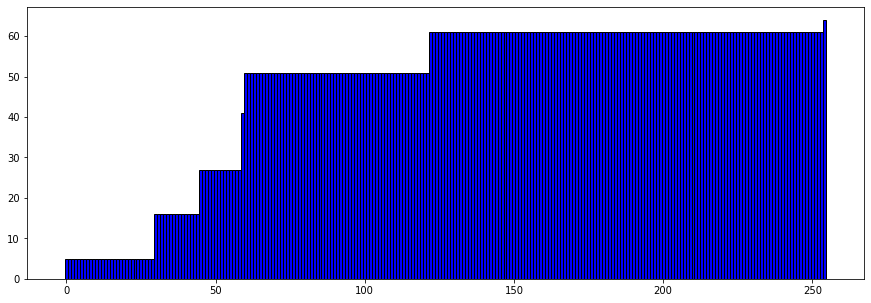

In [11]:
plt.figure(figsize=(15,5))
plt.hist(I.flatten(),bins=range(256),cumulative=True,color='blue',edgecolor='black',align='left') ; plt.show()

Par défaut, le filtre median de la bibliothèque scipy utilise le mode 'reflect'.

‘reflect’ (d c b a | a b c d | d c b a)

    The input is extended by reflecting about the edge of the last pixel.


[[122 122  59  59  59  30  30  30]
 [122 122  59  59  59  59  30  30]
 [122 122  59  59  59  59  30  30]
 [122 122  59  59  59  59  30  30]
 [122 122  59  59  59  59  30  30]
 [ 45  45  45  59  59  60  60  60]
 [ 45  45  45  45  60  60  60  60]
 [ 45  45  45  45  60  60  60  60]]


(-0.5, 7.5, 7.5, -0.5)

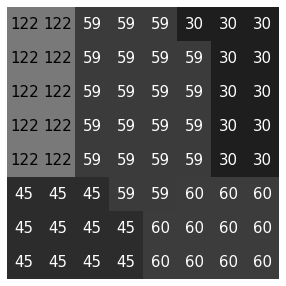

In [12]:
M = scipy.ndimage.median_filter(I, 3)
print(M)
plt.figure(figsize=(5,5))
plt.imshow(M,cmap='gray',vmin=0,vmax=255)
for (j,i),label in np.ndenumerate(M):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>100 else 'w')
plt.axis('off')

# Exercice 6 - Filtrage spatial
----

Différents filtres spatiaux, numérotés de 1 à 6, ont été appliqués à une image de test et ont donné les images résultantes identifiées de A à F. Retrouvez les correspondances et pour chacune, justifiez les réponses.

1. $\begin{pmatrix} -1&-1&-1 \\ 0&0&0 \\ 1&1&1 \end{pmatrix}$<br>
2. $\frac{1}{16}\begin{pmatrix} 1&2&1 \\ 2&4&2 \\ 1&2&1 \end{pmatrix}$<br>
3. $\frac{1}{16}\begin{pmatrix} -1&-2&-1 \\ -2&12&-2 \\ -1&-2&-1 \end{pmatrix}$<br>
4. $\begin{pmatrix} -1&0&1 \\ -1&0&1 \\ -1&0&1 \end{pmatrix}$<br>
5. $\frac{1}{15²}\begin{pmatrix} 1& \cdots &1 \\ \vdots & \ddots & \vdots \\ 1& \cdots &1 \end{pmatrix}$<br>
6. filtre médian $3\times3$

<center>
<img src="./data/ex8.png" width=300>
</center>
<center>
<img src="./data/filtrage.png"  width=600>
</center>



## Solution

1-D : Le filtre 1 est un opérateur de dérivation vertical, appelé filtre de Prewitt vertical. Il génère l'image D, dans laquelle on récupère les contours horizontaux de l'image.

2-C : Le filtre 2 est un filtre gaussien de taille $3\times 3$, il génère l'image C (l'image est légèrement lissée, flou léger).

3-A : Le filtre 3 est un filtre passe-haut construit à partir d'un filtre gaussien (coefficient central positif et élevé, autres coefficients plus petits et négatifs, somme de tous les coefficients nulle). On obtient l'image A (détection de contours).

4-F : Le filtre 4 est opérateur de dérivation horizontal, appelé filtre de Prewitt horizontal. Il génère l'image F, dans laquelle on récupère les contours verticaux de l'image.

5-E : Le filtre 5 est un filtre passe-bas moyenneur $15\times 15$. Il génère l'image E, très lissée, et engendre ainsi un flou considérable dans l'image.

6-B : Le filtre median $3\ times 3$ génère l'image B. Il supprime le bruit poivre et sel lorsque sa fréquence d'occurence n'est pas trop élévée comme dans le carré noir en haut de l'image et laisse les autres zones de l'image intactes.


## Code Python

Text(0.5, 1.0, 'Image test')

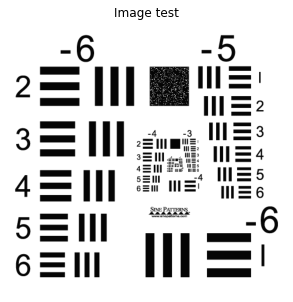

In [13]:
img = plt.imread('./data/mire2.gif')
img = skimage.color.rgb2gray(skimage.color.rgba2rgb(img))
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray',vmin=0,vmax=1)
plt.axis('off')
plt.title('Image test')

In [14]:
h1 =np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 =np.array([[1,2,1],[2,4,2],[1,2,1]]) * 1/16
h3 =np.array([[-1,-2,-1],[-2,12,-2],[-1,-2,-1]]) * 1/16
h4 =np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
h5 = np.ones((15,15)) * 1/(15*15)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


(-0.5, 518.5, 505.5, -0.5)

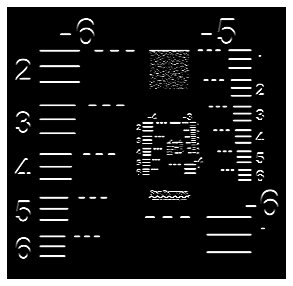

In [15]:
print(h1)
img1 = scipy.ndimage.convolve(img,h1)
plt.figure(figsize=(5,5))
plt.imshow(img1,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


(-0.5, 518.5, 505.5, -0.5)

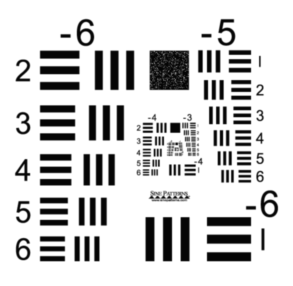

In [16]:
print(h2)
img2 = scipy.ndimage.convolve(img,h2)
plt.figure(figsize=(5,5))
plt.imshow(img2,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

[[-0.0625 -0.125  -0.0625]
 [-0.125   0.75   -0.125 ]
 [-0.0625 -0.125  -0.0625]]


(-0.5, 518.5, 505.5, -0.5)

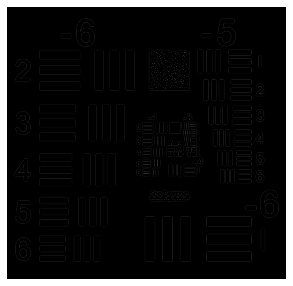

In [17]:
print(h3)
img3 = scipy.ndimage.convolve(img,h3)
plt.figure(figsize=(5,5))
plt.imshow(img3,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


(-0.5, 518.5, 505.5, -0.5)

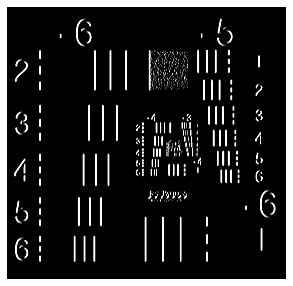

In [18]:
print(h4)
img4 = scipy.ndimage.convolve(img,h4)
plt.figure(figsize=(5,5))
plt.imshow(img4,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

(-0.5, 518.5, 505.5, -0.5)

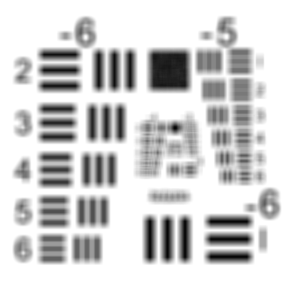

In [19]:
#print(h5)
img5 = scipy.ndimage.convolve(img,h5)
plt.figure(figsize=(5,5))
plt.imshow(img5,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

(-0.5, 518.5, 505.5, -0.5)

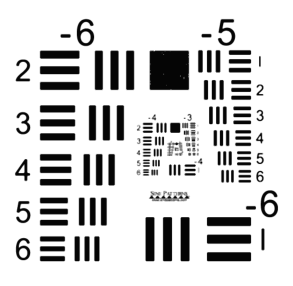

In [20]:
#print(h6)
img6 = scipy.ndimage.median_filter(img, 3)
plt.figure(figsize=(5,5))
plt.imshow(img6,cmap='gray',vmin=0,vmax=1)
plt.axis('off')

# Exercice 7
----

L'image suivante est une image à niveaux de gris de taille $8 \times8$ pixels et dont les valeurs des niveaux de gros sont codés sur 8 bits. Cette image représente une forme rectangulaire sur un fond.

<center>
$$I=\begin{pmatrix} 13&13&12&12&12&11&11&11 \\ 13&12&12&12&11&11&11&10 \\ 12&12&8&7&6&5&10&10 \\ 12&12&7&6&5&4&10&10  \\ 12&11&6&5&4&3&10&9 \\ 11&11&5&4&3&2&9&9 \\ 11&11&10&10&10&9&9&9 \\ 11&10&10&10&9&9&9&8 \end{pmatrix}$$

<img src="./data/rect.png" width=500>
</center>

1. 
Représentez l'histogramme de cette image
2. 
Donnez la fonction permettant le recadrage dynamique de cet histogramme de façon à utiliser toute la plage des niveaux de gris et donner la LUT correspondante en appliquant cette fonction aux differentes valeurs de niveaux de gris. Attention, cette LUT ne sera pas appliquée dans les questions suivantes
3. 
Soit $h_1$ et $h_2$ les filtres de convolution definis respectivement par les noyaux suivants :
$$h_1=\begin{pmatrix} -1&-1&0 \\ -1&0&1 \\ 0&1&1 \end{pmatrix} \qquad h_2=\frac{1}{10}\begin{pmatrix} 1&1&1 \\ 1&2&1 \\ 1&1&1 \end{pmatrix}$$ 
A quel type de filtres correspondent les filtres $h_1$ et $h_2$ ?
4. 
Lequel de ces deux filtres faut-il utiliser pour effectuer une détection de contours sur l’image $I$ ? 
5. 
Quels sont les résultats de la convolution du filtre $h_1$ sur les pixels de l’image $I$ de coordonnees : (1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (2,5) et (5,2) ? Que constatez-vous ? Quel filtre faudrait-il associer à $h_1$ pour améliorer le resultat ?
6. 
Appliquer le filtre $h_2$ sur le pixel de l'image $I$ de coordonnées (2,2) ainsi qu’un filtre médian de taille $3\times3$ puis comparer et discuter les resultats de ces deux filtres.
7. 
En analysant l’image $I$ et son histogramme, binariser correctement l’image de façon à separer la forme rectangulaire du fond. Donner la valeur du seuil choisi et representer l’image binaire par des 0 et des 1.

## Solution et code Python

[[13 13 12 12 12 11 11 11]
 [13 12 12 12 11 11 11 10]
 [12 12  8  7  6  5 10 10]
 [12 12  7  6  5  4 10 10]
 [12 11  6  5  4  3 10  9]
 [11 11  5  4  3  2  9  9]
 [11 11 10 10 10  9  9  9]
 [11 10 10 10  9  9  9  8]]


(-0.5, 7.5, 7.5, -0.5)

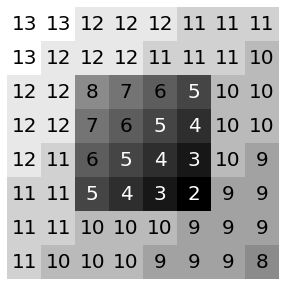

In [21]:
I = np.array([[13,13,12,12,12,11,11,11],[13,12,12,12,11,11,11,10],[12,12,8,7,6,5,10,10],[12,12,7,6,5,4,10,10],[12,11,6,5,4,3,10,9],[11,11,5,4,3,2,9,9],[11,11,10,10,10,9,9,9],[11,10,10,10,9,9,9,8]])
print(I)
plt.figure(figsize=(5,5))
plt.imshow(I,cmap='gray')
for (j,i),label in np.ndenumerate(I):
    plt.text(i,j,label,ha='center',va='center',size=20,color='k' if label>5 else 'w')
plt.axis('off')

(1)
Histogramme de l'image $I$

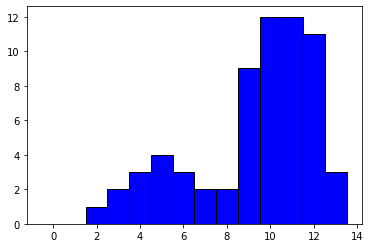

In [22]:
plt.hist(I.ravel(),bins=range(15),color='blue',edgecolor='black',align='left') ; plt.show()
#plt.xticks(range(0,14))

(2)
Formule du recadrage dynamique d'un histogramme

$[a,b]$ : intervalle d'origine

$[A,B]$ : intervalle après recadrage dynamique 

<center>
$I_{rec} = (I-a)\times \frac{(B-A)}{(b-a)} + A$
</center>

Avec pour intervalle d'arrivée $[0-255]$ pour une image 8-bits (i.e utilisation de toute la plage des niveaux de gris possibles), on obtient :

<center>
$I_{rec} = (I-a)\times \frac{255}{(b-a)}$
</center>

2 13
0 255


Text(0.5, 1.0, 'Image après recadrage dynamique')

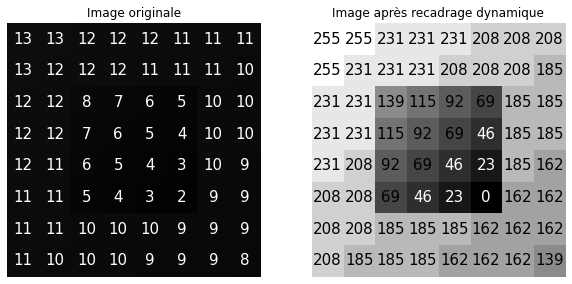

In [23]:
a = I.min()
b = I.max()
print(I.min(),I.max())
A=0
B=255
I2 = np.array( (I-a)*((B-A)/(b-a)) + A, dtype='uint8')
print(I2.min(),I2.max())
plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
for (j,i),label in np.ndenumerate(I):
    plt.text(i,j,label,ha='center',va='center',size=15,color='w' )
plt.axis('off')
plt.title('Image originale')
plt.subplot(122)
plt.imshow(I2,cmap='gray',vmin=0,vmax=255)
for (j,i),label in np.ndenumerate(I2):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>50 else 'w')
plt.axis('off')
plt.title('Image après recadrage dynamique')

Pour bien voir l'effet du recadrage dynamique avec Python et Matplotlib, il faut forcer l'échelle de couleurs aux mêmes valeurs (`vmin=0` et `vmax=255`) dans les deux cas.


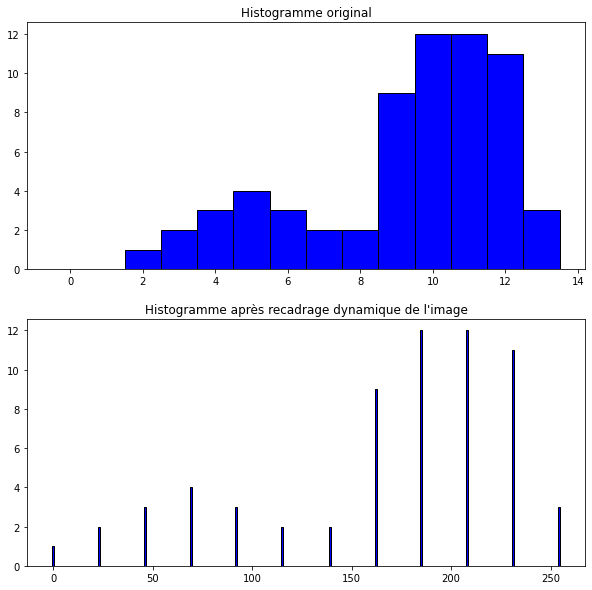

In [24]:
plt.subplots(2,1,figsize=(10,10))
plt.subplot(211)
plt.hist(I.ravel(),bins=range(15),color='blue',edgecolor='black',align='left') 
plt.title('Histogramme original')
plt.subplot(212)
plt.hist(I2.ravel(),bins=range(256),color='blue',edgecolor='black',align='left') 
plt.title("Histogramme après recadrage dynamique de l'image")
plt.show()

On constate que la répartition spatiale des bins de l'histogramme est bien différente mais par leur taille (normalisation linéaire)

(3)

$h_1$ est un filtre passe-haut (coefficient central positif et élevé, autres coefficients plus petits et négatifs, somme de tous les coefficients nulle).

$h_2$ est un filtre passe-bas (coefficient central supérieur ou égal aux autres et coefficients tous positifs)

In [25]:
h1 = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])
print(h1)

[[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]


In [26]:
h2 = np.array([[1,1,1],[1,2,1],[1,1,1]]) * 1/10
print(h2)

[[0.1 0.1 0.1]
 [0.1 0.2 0.1]
 [0.1 0.1 0.1]]


(4)
Il faut utiliser le filtre $h_1$ pour une détection de contours sur l'image $I$.

(5)
Résultat de la convolution du filtre $h_1$ sur l'image $I$

[[ 38  23  23  23  21  21  21  -1]
 [ 23  -7 -10 -12 -14  -8  -3 -23]
 [ 23 -10 -16 -15 -16  -4   3 -21]
 [ 23 -12 -15  -8  -8   7  10 -21]
 [ 21 -14 -16  -8  -8   8  10 -21]
 [ 21  -8  -4   7   8  17  12 -19]
 [ 21  -3   3  10  10  12   6 -19]
 [ -1 -23 -21 -21 -21 -19 -19 -27]]


(-0.5, 7.5, 7.5, -0.5)

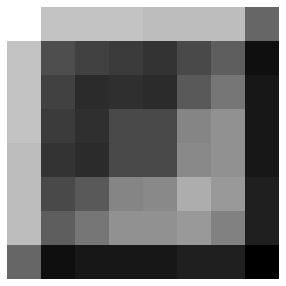

In [27]:
G1 = scipy.ndimage.convolve(I,h1[::-1, ::-1],mode='constant',cval=0)
print(G1)
plt.figure(figsize=(5,5))
plt.imshow(G1,cmap='gray')
plt.axis('off')

Par défaut, la fonction <code>convolve</code> utilise le mode 'reflect' ce qui limite la perte d'information sur les bords.

Voyons voir le résultat obtenu sur l'image avec un "vrai" filtre détecteurs de contours (Prewitt)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


(-0.5, 7.5, 7.5, -0.5)

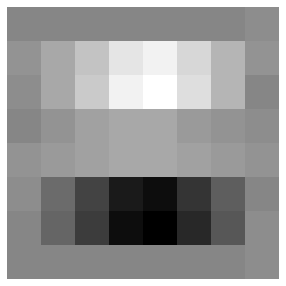

In [28]:
hP = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
print(hP)
GP = scipy.ndimage.convolve(I,hP)
plt.figure(figsize=(5,5))
plt.imshow(GP,cmap='gray')
plt.axis('off')

Pour améliorer encore les choses, il faudrait utiliser un filtre de Sobel
$$h_s=\begin{pmatrix} -1&-2&-1 \\ 0&0&0 \\ 1&2&1 \end{pmatrix}$$

En effet, ce filtre est dit séparable. En d'autres termes, il devient possible de convoluer l'image avec un noyau horizontal suivie d'une convolution avec un noyau vertical.

$$\begin{pmatrix} -1&-2&-1 \\ 0&0&0 \\ 1&2&1 \end{pmatrix} = \begin{pmatrix} -1&-2&-1 \end{pmatrix} \times \begin{pmatrix} 1\\0\\-1 \end{pmatrix}$$

La première convolution réalise un lissage de l'image selon la direction horizontale (le noyau utilisé est alors la ligne centrale du noyau gaussien $3\times 3$, ce qui a pour effet d'atténuer le bruit).

Ensuite, la deuxième convolution calcule, pour chaque pixel $p$, la différence entre le pixel à droite et le pixel à gauche de ce pixel $p$ (c'est donc une mesure de variation).

(-0.5, 7.5, 7.5, -0.5)

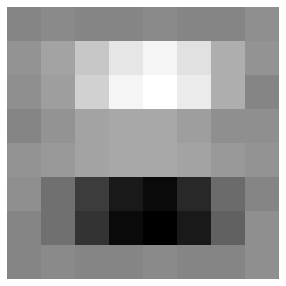

In [29]:
hs = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
G1S = scipy.ndimage.convolve(I,hs)
plt.figure(figsize=(5,5))
plt.imshow(G1S,cmap='gray')
plt.axis('off')

(6)
Résultat de la convolution du filtre $h_2$ sur l'image $I$

In [30]:
G2 = scipy.ndimage.convolve(I,h2,mode='constant',cval=0.0)
print(G2)

[[ 6  8  8  8  8  7  7  5]
 [ 8 11 11 10  9  9 10  7]
 [ 8 11  9  8  7  7  9  7]
 [ 8 10  8  6  5  6  8  6]
 [ 8  9  7  5  4  5  7  6]
 [ 7  9  7  6  5  6  7  6]
 [ 7 10  9  8  7  7  8  6]
 [ 5  7  7  6  6  6  6  4]]


(-0.5, 7.5, 7.5, -0.5)

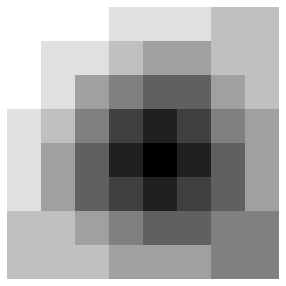

In [31]:
G2 = scipy.ndimage.convolve(I,h2)
plt.figure(figsize=(5,5))
plt.imshow(G2,cmap='gray')
plt.axis('off')

[[13 13 12 12 12 11 11 11]
 [13 12 12 12 11 11 11 10]
 [12 12 12  7  6 10 10 10]
 [12 12  7  6  5  5 10 10]
 [12 11  6  5  4  4  9  9]
 [11 11 10  5  4  9  9  9]
 [11 11 10 10  9  9  9  9]
 [11 10 10 10  9  9  9  9]]


(-0.5, 7.5, 7.5, -0.5)

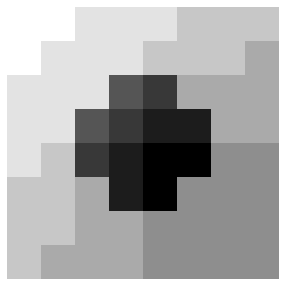

In [32]:
M = scipy.ndimage.median_filter(I, 3)
print(M)
plt.figure(figsize=(5,5))
plt.imshow(M,cmap='gray')
plt.axis('off')

Le filtre médian ne dégrade pas l'information des plages d'intensités homogènes (comme le fond de l'image).
Les frontières sont conservées, seul le carré au centre est réduit. L'intégrité des contours est préservée (sans les rendre flous)

Le filtre passe-bas aura tendance à étaler toutes les frontières entre les différentes régions de l'image (moyennage local d'un pixel et de ses voisins). Les changements brusques d'intensité sont fortement atténués.                                                                                    
                                                                                      

(7)
Pour séparer la forme rectangulaire du fond par binarisation d'image, on peut se servir de l'histogramme et définir ainsi le seuil le plus adapté.

Deux modes se dessinent sur l'histogramme (rectangle pour les niveaux de gris les plus faibles et fond pour les niveaux de gris les plus élevés)

On peut choisir $9$ comme valeur seuil. Tous les pixels dont l'intensité sera inférieure à $9$ seront mis à $1$ (blanc), les autres à $0$ (noir)

Remarque : on éliminera très facilement le pixel isolé en bas à droite de l'image par une opération de morphologie mathématique, ici une ouverture (érosion suivie d'une dilatation).

(-0.5, 7.5, 7.5, -0.5)

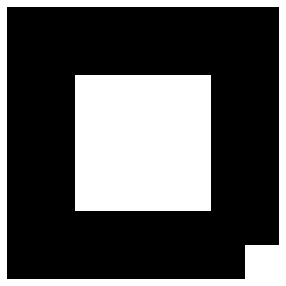

In [33]:
B = I<9
plt.figure(figsize=(5,5))
plt.imshow(B,cmap='gray')
plt.axis('off')

# Exercice 8 - Segmentation par croissance de régions
-----
On considère l’image $f$ dont les niveaux de gris sont donnés ci-dessous :

<center>
$$f=\begin{pmatrix} 4&6&2&0&2&4&4&3 \\ 4&2&10&1&6&3&2&1 \\ 0&7&1&8&12&9&8&1 \\ 2&10&3&4&10&15&5&11  \\ 8&9&1&2&10&11&13&5 \\ 2&0&6&3&9&10&0&2 \\ 2&6&0&9&2&4&7&1 \\ 3&4&5&7&1&6&8&2 \end{pmatrix}$$

<img src="./data/croissance.png" width=600>
</center>



Donnez la solution obtenue en effectuant une croissance de région dont le germe correspond au pixel indiqué par une croix rouge. 

Un pixel $f(x,y)$ est agrégé s’il a au moins un voisin $f(x',y')$ (dans le cas d’une 4–connexité) déjà agrégé tel que : 

$$ |f(x,y)-f(x',y')|\leqslant 5 $$

## Solution et code Python

[[ 4  6  2  0  2  4  4  3]
 [ 4  2 10  1  6  3  2  1]
 [ 0  7  1  8 12  9  8  1]
 [ 2 10  3  4 10 15  5 11]
 [ 8  9  1  2 10 11 13  5]
 [ 2  0  6  3  9 10  0  2]
 [ 2  6  0  9  2  4  7  1]
 [ 3  4  5  7  1  6  8  2]]


(-0.5, 7.5, 7.5, -0.5)

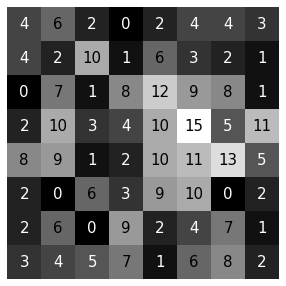

In [34]:
f = np.array([[4,6,2,0,2,4,4,3],[4,2,10,1,6,3,2,1],[0,7,1,8,12,9,8,1],[2,10,3,4,10,15,5,11],[8,9,1,2,10,11,13,5],[2,0,6,3,9,10,0,2],[2,6,0,9,2,4,7,1],[3,4,5,7,1,6,8,2]])
print(f)
plt.figure(figsize=(5,5))
for (j,i),label in np.ndenumerate(f):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>5 else 'w')
plt.imshow(f,cmap='gray')
plt.axis('off')

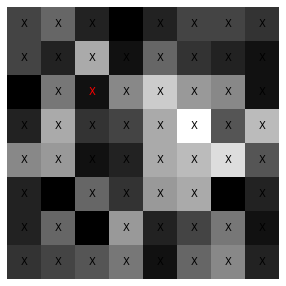

In [35]:
plt.figure(figsize=(5,5))
plt.imshow(f,cmap='gray')
plt.axis('off')
for (j,i),label in np.ndenumerate(f):
    if (j ==2 and i==2):
        plt.text(i,j,"X",ha='center',va='center',size=10,color='red')
    else:
        plt.text(i,j,"X",ha='center',va='center',size=10,color='black')

In [36]:
seed = (2,2)
orient = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 4 connectivity
cur_pix = [seed[0], seed[1]]

size = 1

dims = f.shape
pix_area = dims[0]*dims[1]
reg = np.zeros(dims)
reg[seed[0], seed[1]] = 1

#Spreading
while(size<pix_area):
#adding pixels
    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    for j in range(4):
        #select new candidate
        temp_pix = [cur_pix[0] +orient[j][0], cur_pix[1] +orient[j][1]]
        is_in_img = dims[0]>temp_pix[0]>0 and dims[1]>temp_pix[1]>0 #returns boolean
        #candidate is taken if not already selected before
        if (is_in_img and (reg[temp_pix[1], temp_pix[0]]==0)):
            contour.append(temp_pix)
            contour_val.append(f[temp_pix[1], temp_pix[0]])

    # Chosen criteria
    diff_list = abs(f[cur_pix[1], cur_pix[0]]-contour_val)
    index = np.where(diff_list <= 5)[0]
    size += 1 # updating region size

    #updating seed
    for i in range(len(index)):
        #print(index[i])
        cur_pix = contour[index[i]]
        reg[cur_pix[1], cur_pix[0]] = 1


On affiche le résultat de la segmentation en bleu et on le superpose à l'image $f$

(-0.5, 7.5, 7.5, -0.5)

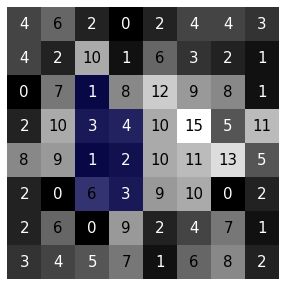

In [37]:
plt.figure(figsize=(5,5))
for (j,i),label in np.ndenumerate(f):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>5 else 'w')
plt.imshow(f,cmap='gray')
regseg = np.ma.masked_where(reg == 0, reg)
plt.imshow(-regseg,cmap='jet',alpha=0.5)
plt.axis('off')

L'utilisation de la fonction <code>flood_fill</code> de la bibliothèque <code>scikit-image</code> donne un résultat différent car la tolérance de 5 s'applique entre le pixel à tester et le germe initial.

In [38]:
from skimage.segmentation import flood_fill
el = scipy.ndimage.generate_binary_structure(2, 1)
g = flood_fill(f, (2,2), new_value=255, selem=el, tolerance=5)

(-0.5, 7.5, 7.5, -0.5)

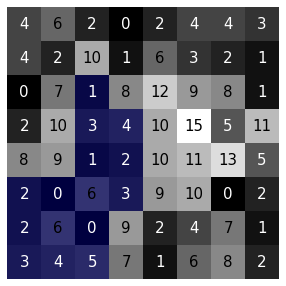

In [39]:
plt.figure(figsize=(5,5))
for (j,i),label in np.ndenumerate(f):
    plt.text(i,j,label,ha='center',va='center',size=15,color='k' if label>5 else 'w')
plt.imshow(f,cmap='gray')
gseg = np.ma.masked_where(g != 255, g)
plt.imshow(-gseg,cmap='jet',alpha=0.5)
plt.axis('off')